In [3]:
import pandas as pd

import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb
plt.style.use('ggplot')

%matplotlib inline


In [4]:
address = 'GlobalTemperatures.csv'
df = pd.read_csv(address, parse_dates = ['dt'])
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


Summary

In [5]:
df.shape

(3192, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null datetime64[ns]
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 224.5 KB


In [7]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


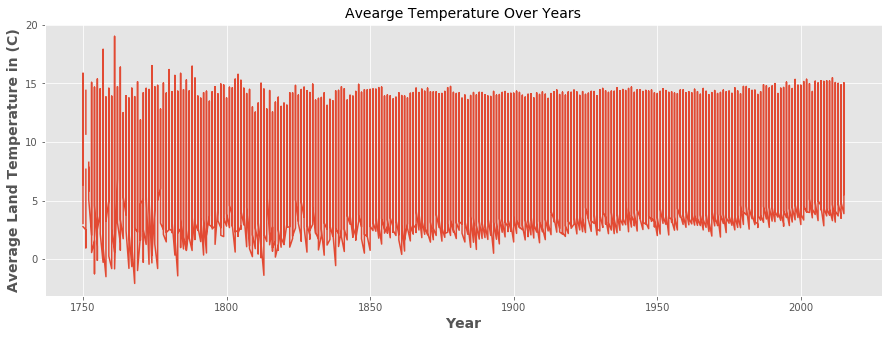

In [10]:
rcParams['figure.figsize'] = (15, 5)

plt.title('Avearge Temperature Over Years', fontsize = 14)
plt.xlabel('Year', fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.ylabel('Average Land Temperature in (°C)', fontdict = {'fontsize':14, 'fontweight':'bold'})

plt.plot(df.dt.dt.year, df['LandAverageTemperature'])
plt.show()

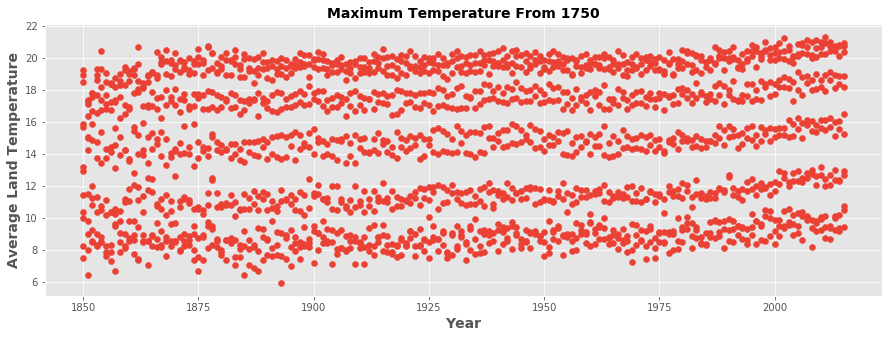

In [12]:
plt.title('Maximum Temperature From 1750', fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.xlabel('Year', fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.ylabel('Average Land Temperature', fontdict = {'fontsize':14, 'fontweight':'bold'})

plt.scatter(df.dt.dt.year, df['LandMaxTemperature'], color = '#eb4034')
plt.show()

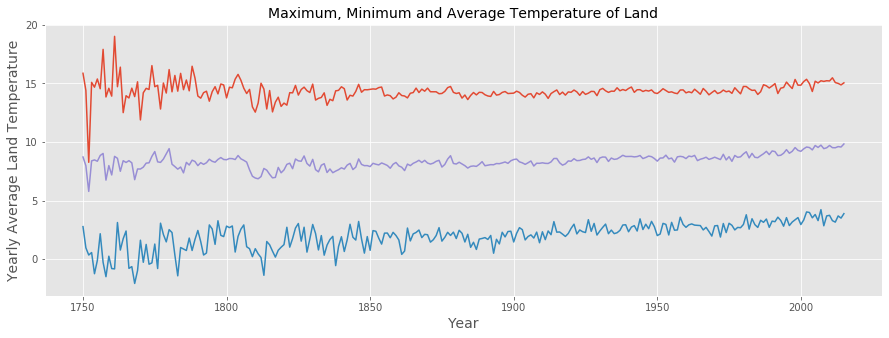

In [21]:
land_temp = df.groupby(df.dt.dt.year).LandAverageTemperature.agg(['max', 'min', 'mean'])

plt.title('Maximum, Minimum and Average Temperature of Land', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Yearly Average Land Temperature', fontsize = 14)

plt.plot(land_temp)
plt.show()

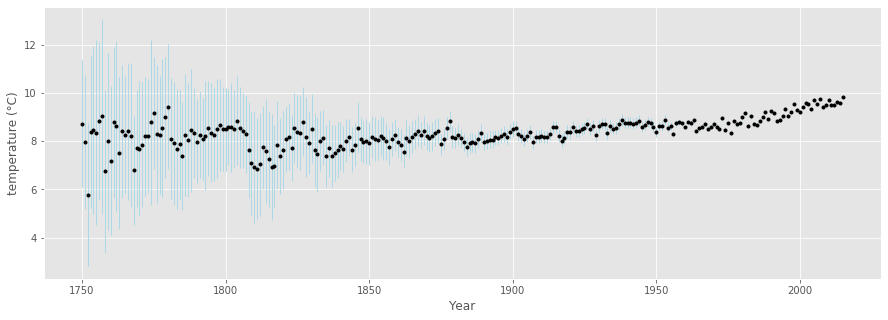

In [22]:
average_temp_year = df.groupby(df.dt.dt.year).mean()

plt.xlabel('Year')
plt.ylabel('temperature (°C)')
plt.errorbar(average_temp_year.index, average_temp_year.LandAverageTemperature, 
             yerr=average_temp_year.LandAverageTemperatureUncertainty, fmt='.', color='black', ecolor='lightblue', elinewidth=1)
plt.show()

###### Loading and Reading data again as a new DataFrame

In [23]:
globaltemp = pd.read_csv('GlobalTemperatures.csv')
globaltemp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
globaltemp['dt'] = pd.to_datetime(globaltemp['dt'])
globaltemp['Year'] = globaltemp['dt'].dt.year
globaltemp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


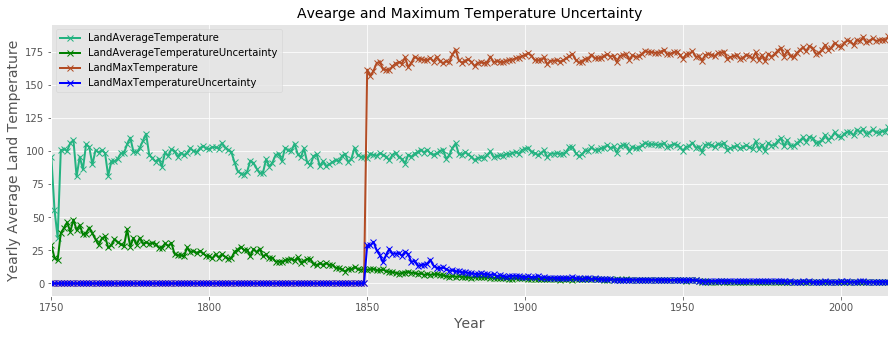

In [28]:
grp_by_year = globaltemp.groupby('Year').sum()

grp_by_year.LandAverageTemperature.plot(linewidth = 2, color = '#24b381', marker = 'x')
grp_by_year.LandAverageTemperatureUncertainty.plot(linewidth = 2, color = 'green', marker= 'x')
grp_by_year.LandMaxTemperature.plot(linewidth = 2, color = '#b34c24', marker = 'x')
grp_by_year.LandMaxTemperatureUncertainty.plot(linewidth= 2, color = 'blue', marker = 'x')

plt.title('Avearge and Maximum Temperature Uncertainty', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Yearly Average Land Temperature', fontsize = 14)
plt.legend(loc = 'best')
plt.show()


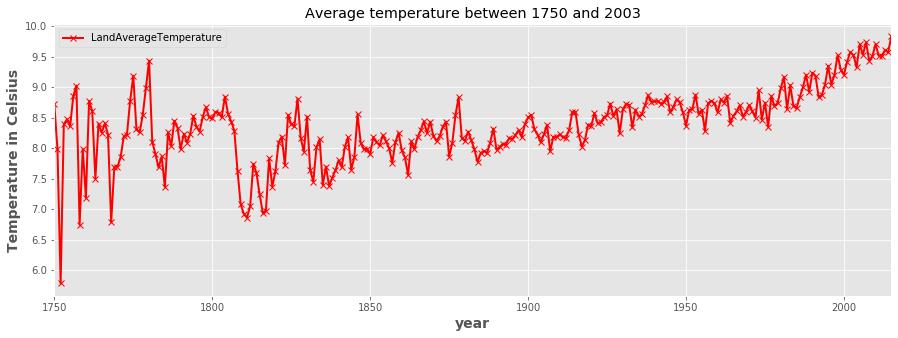

In [31]:
temperature_by_year = globaltemp.groupby('Year').mean()
temperature_by_year.LandAverageTemperature.plot(linewidth=2, color='red',marker='x')

plt.title('Average temperature between 1750 and 2003')
plt.xlabel('year', fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.ylabel('Temperature in Celsius', {'fontsize':14, 'fontweight':'bold'})
plt.legend()
plt.show()